In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style = "darkgrid")

In [3]:
df_plot = pd.read_csv('../data/processed/COVID_small_flat_table.csv', sep = ';')
df_plot.head()

,date,Italy,US,Spain,Germany,India
0,2020-01-22,0,1,0,0,0
1,2020-01-23,0,1,0,0,0
2,2020-01-24,0,2,0,0,0
3,2020-01-25,0,2,0,0,0
4,2020-01-26,0,5,0,0,0


<Figure size 1152x648 with 0 Axes>

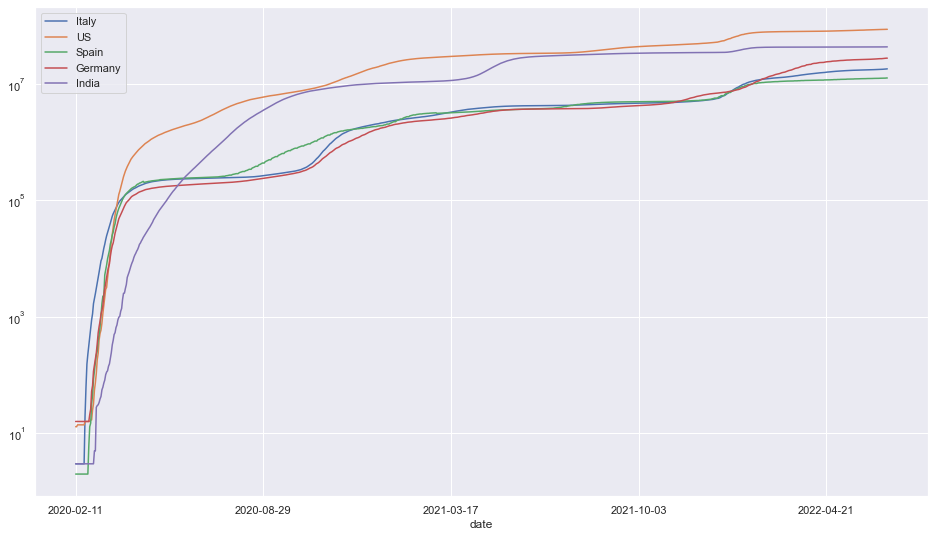

In [8]:
plt.figure();
ax = df_plot.iloc[20:,:].set_index('date').plot()
ax.set_yscale('log')

In [34]:
import plotly.graph_objects as go

In [35]:
import plotly
plotly.__version__

'5.6.0'

In [36]:
fig = go.Figure()

In [37]:
country_list = ['Italy',
               'US',
               'Spain',
               'Germany',
               'India',
               ]

In [38]:
for each in country_list:
    fig.add_trace(go.Scatter(x=df_plot.date,
                             y = df_plot[each],
                             mode = 'markers+lines',
                             opacity = 0.9,
                            line_width = 2,
                            marker_size = 4,
                            name = each))


fig.update_layout(
    width = 1000,
    height = 600,
    xaxis_title = "Time",
    yaxis_title = "confirmed infected people (Joh hopkins data set, log-scale)",
)
fig.update_yaxes(type = "linear")


fig.update_layout(xaxis_rangeslider_visible = True)


In [44]:
import dash
from dash import dcc
import dash_html_components as html


app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    dcc.Dropdown(
        id = 'country_drop_down',
        options = [
            {'label': 'Italy', 'value': 'Italy'},
            {'label': 'US', 'value': 'US'},
            {'label': 'Spain', 'value': 'Spain'},
            {'label': 'germany', 'value': 'Germany'},
            {'label': 'India', 'value': 'India'}
        ],
        value = ['US', 'Germany'],
        multi = True
    ),
    
    dcc.Graph(figure=fig, id = 'main_window_slope')
])

In [45]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=df_plot.date,
                          y= df_plot[each],
                          mode = 'markers+lines',
                          opacity= 0.9,
                          line_width =2,
                           marker_size = 4,
                            name = each
                          )
                     )
    return {
        'data' : traces,
        'layout': dict(
            width = 1600,
            height = 1200,
            xaxis_title = "Time",
            yaxis_title = "confirmed infected people (Joh hopkins data set, Linear scale)",
            xaxis = {'tickangle': -45,
                    'nticks': 20,
                    'tickfont': dict(size = 14, color = "#7f7f7f"),
                    },
            yaxis = {'type': "linear"
                    }
        )
    }

In [46]:
app.run_server(debug=True, use_reloader = False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
